In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
data= pd.read_csv("netflix.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
#shape of dataset
data.shape

(8790, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
#data.rename(columns={'listed_in':'cateogory'}, inplace=True)
data.rename(columns={'listed_in':'categories'},inplace=True)

In [7]:
#find any null value
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
categories      0
dtype: int64

In [8]:
#number of unique values in dataset
data.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
categories       513
dtype: int64

In [9]:
#values in type column
data.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [10]:
#values in title column
data.title.value_counts()

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [11]:
#duplicates in title column
data.title.duplicated().nunique()

2

In [12]:
#drop duplicates from title column
data= data.drop_duplicates(subset='title')

In [13]:
#after removing duplicates, check again duplicates
data.title.duplicated().nunique()

1

In [14]:
#number of directors in dataset
data.director.value_counts()

Not Given                         2587
Rajiv Chilaka                       20
Raúl Campos, Jan Suter              18
Alastair Fothergill                 18
Marcus Raboy                        16
                                  ... 
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [15]:
#group dataset that has only "Not Given" directors
data[data.director=='Not Given'].head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,categories
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,TV Show,Jaguar,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,TV Show,Chicago Party Aunt,Not Given,Pakistan,9/17/2021,2021,TV-MA,1 Season,TV Comedies


In [16]:
data.country.value_counts()

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [17]:
#group dataset that has only "Not Given" countries
data[data.country=='Not Given'].head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,categories
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers


### Visualize the Data and do Analysis

C:\Users\WindowS 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


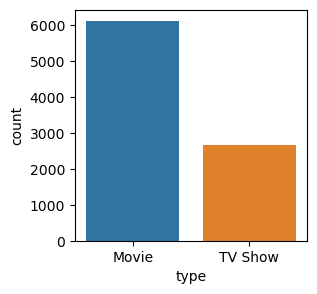

In [18]:
plt.figure(figsize = (3,3))
sns.countplot(data['type']);

### Top 10 Countries Analysis

In [19]:
top_10_countries=data.country.value_counts(ascending=False).drop('Not Given').head(10)
top_10_countries

United States     3240
India             1056
United Kingdom     638
Pakistan           420
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: country, dtype: int64

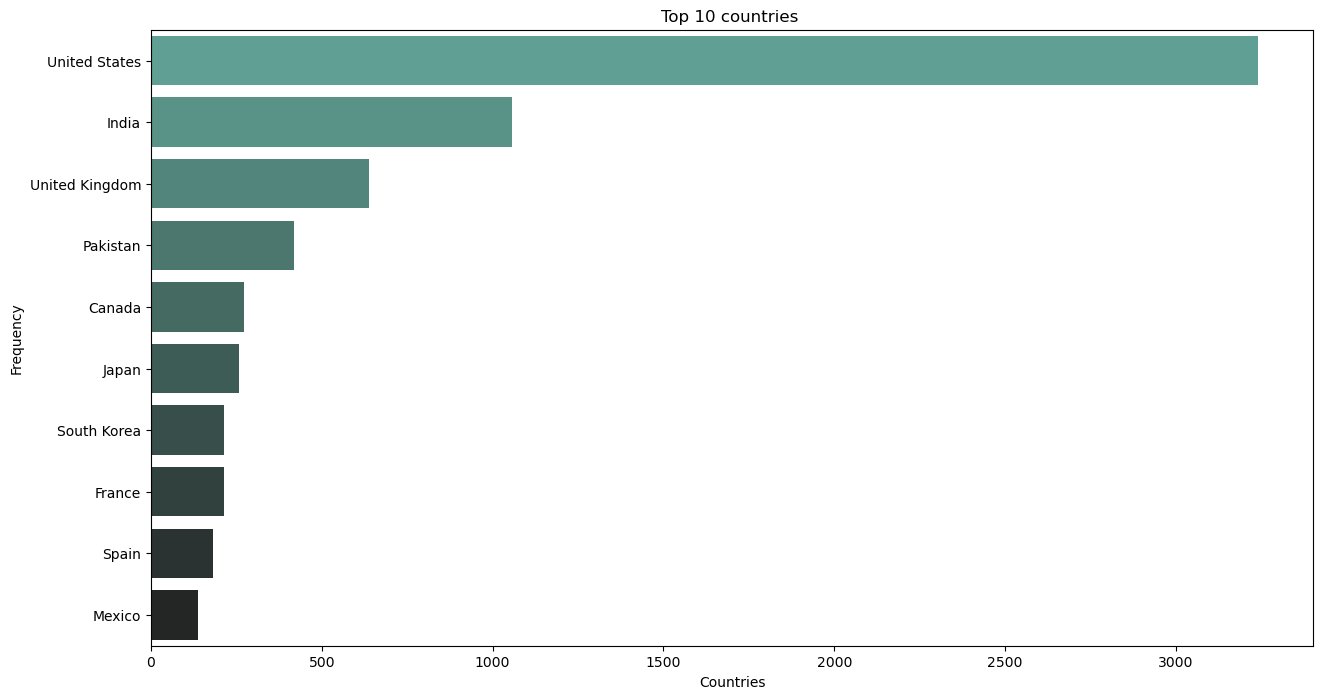

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index,palette="dark:#5A9_r")
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Top 10 countries ');

`Top 10 countries Analysis shows that United State rank no.1 in the production of TV shows and Movies`

### Top 10 Directors Analysis

In [21]:
top_10_directors=data.director.value_counts(ascending=False).drop('Not Given').head(10)
top_10_directors

Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Name: director, dtype: int64

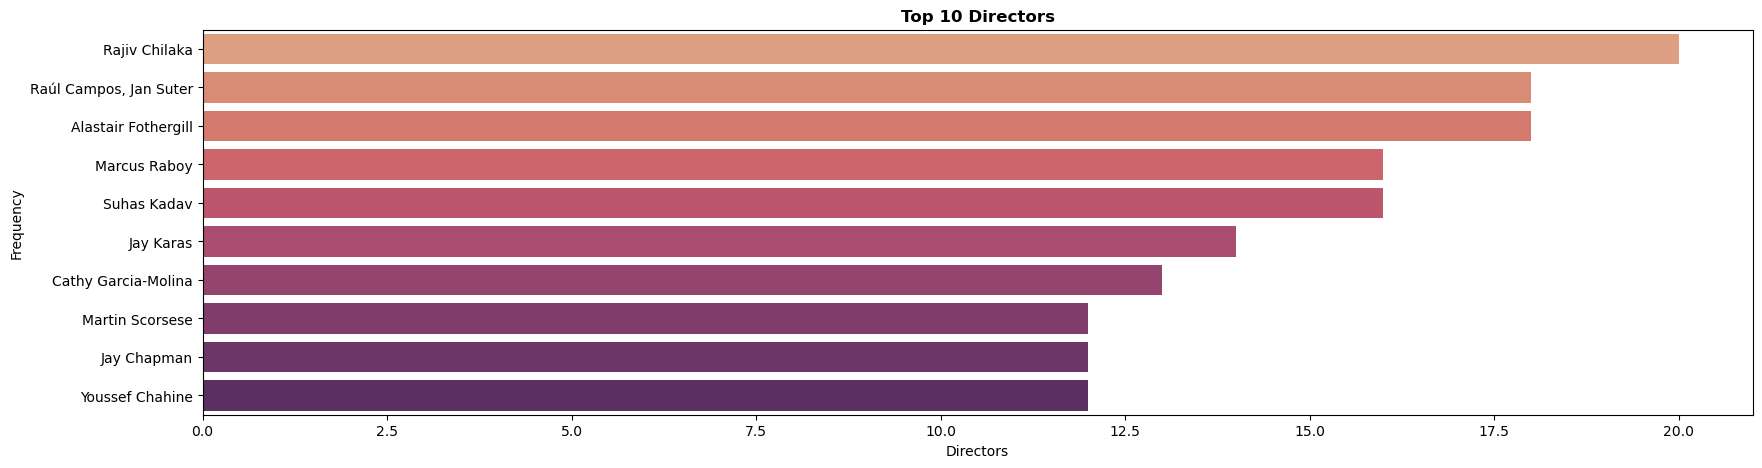

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,palette='flare' )
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.title('Top 10 Directors',fontweight='bold')
plt.show()

`The director who has directed maximum number of Tv shows and Movies is Rajiv Chilaka`

In [23]:
ratings=data.rating.value_counts(ascending=False)
ratings

TV-MA       3205
TV-14       2155
TV-PG        861
R            798
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

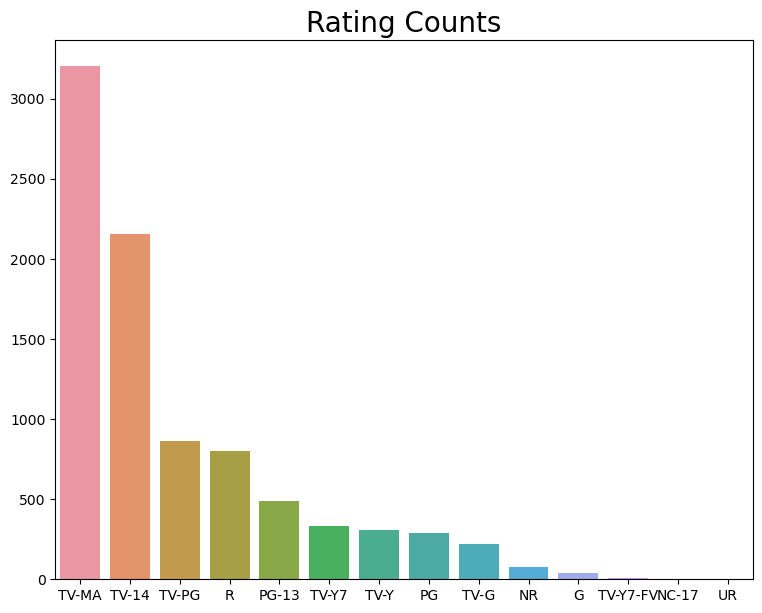

In [24]:
plt.figure(figsize=(9,7))
sns.barplot(x=ratings.index, y=ratings.values)
plt.title("Rating Counts", fontsize=20)
plt.show();

`Most of the shows has got the rating of TV-MA, TV-14 and TV-PG and this plot shows that kids channel got least rating`

### Top 10 Categories Analysis

In [25]:
top_10_categories= data.categories.value_counts(ascending=False).head(10)
top_10_categories

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: categories, dtype: int64

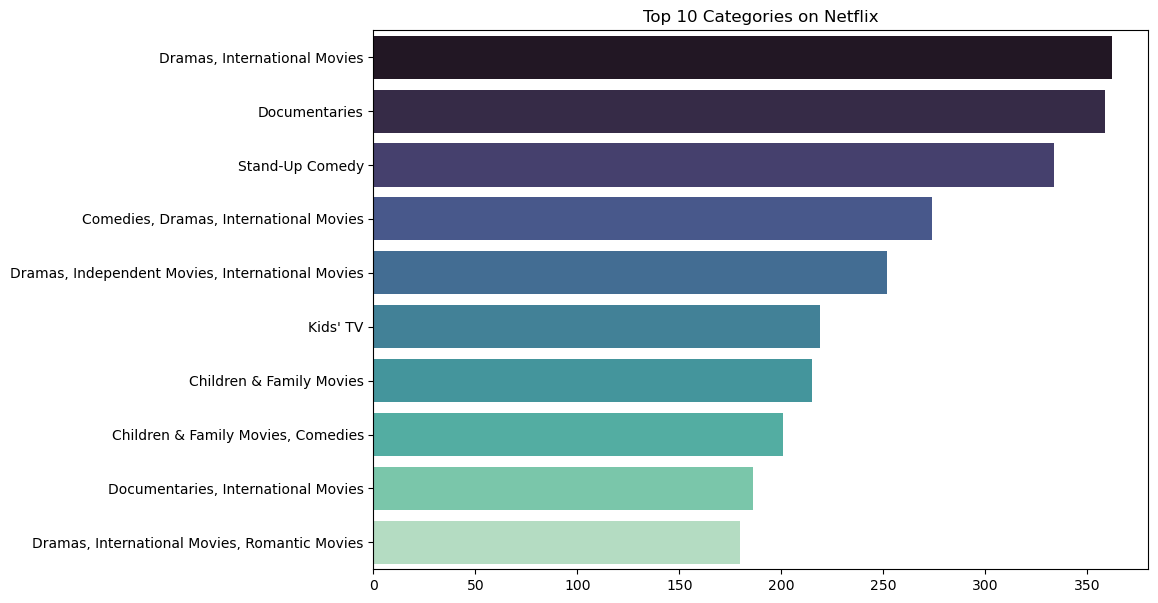

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index,palette='mako')
plt.title('Top 10 Categories on Netflix');

`top three categories which has been produced are Dramas,International movies, Documentaries
and Stand up comedy`

<AxesSubplot:xlabel='rating', ylabel='count'>

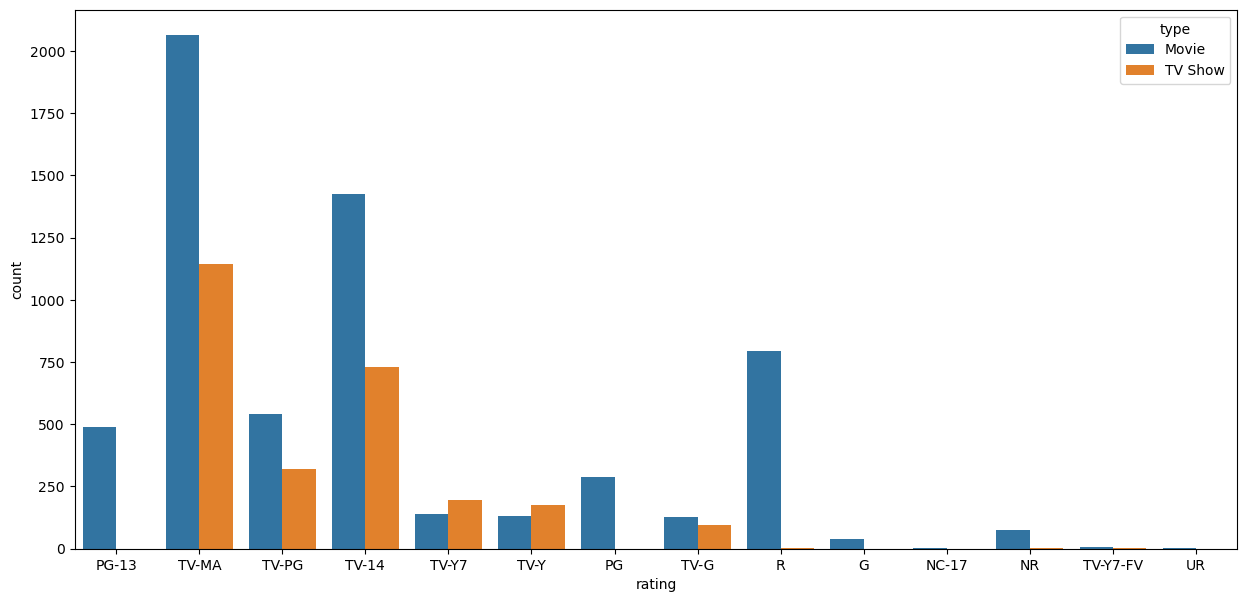

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='rating', hue='type')

In [28]:
# count the number of ratings for TV Shows and Movies
tvshow_ratings_count = data[data['type'] == 'TV Show']['rating'].count()
movie_ratings_count = data[data['type'] == 'Movie']['rating'].count()

# print the results
print("Number of ratings for TV Shows:", tvshow_ratings_count)
print("Number of ratings for Movies:", movie_ratings_count)

Number of ratings for TV Shows: 2663
Number of ratings for Movies: 6124


`This Analysis shows that Movies got maximum ratings`

In [29]:
top_release_year=data.release_year.value_counts(ascending=False).head(10)
top_release_year

2018    1144
2017    1030
2019    1029
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

<AxesSubplot:ylabel='release_year'>

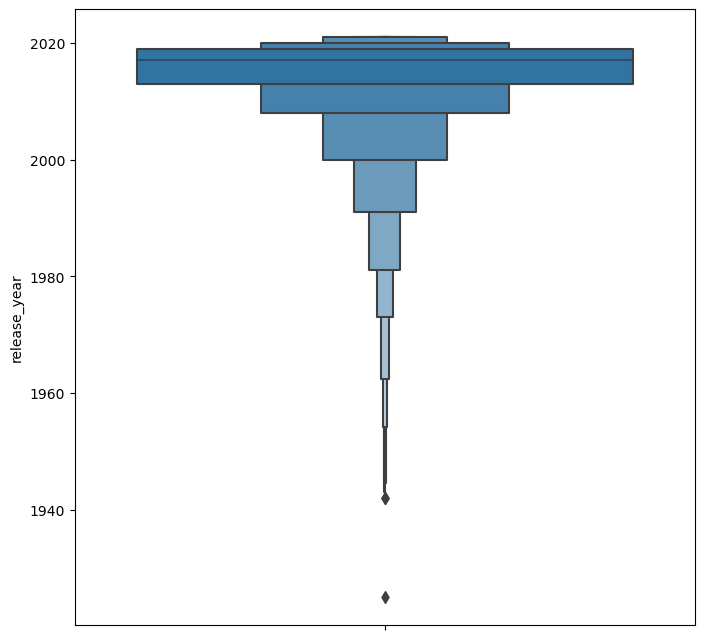

In [30]:
plt.figure(figsize=(8,8))
sns.boxenplot(y=data['release_year'])

**Figure tells us about any outlier present in dataset**

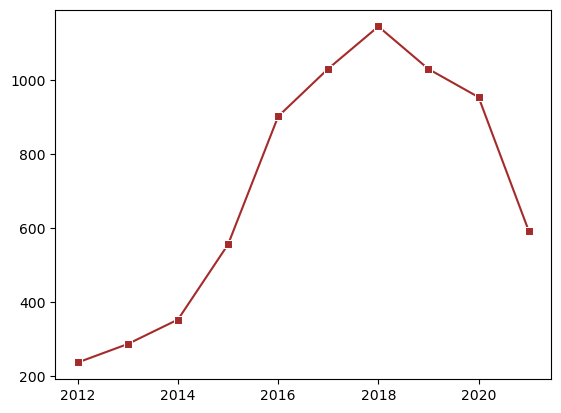

In [31]:
sns.lineplot(x=top_release_year.index,
             y=top_release_year.values,
             alpha = 1, 
             color = "brown", marker='s');

<AxesSubplot:>

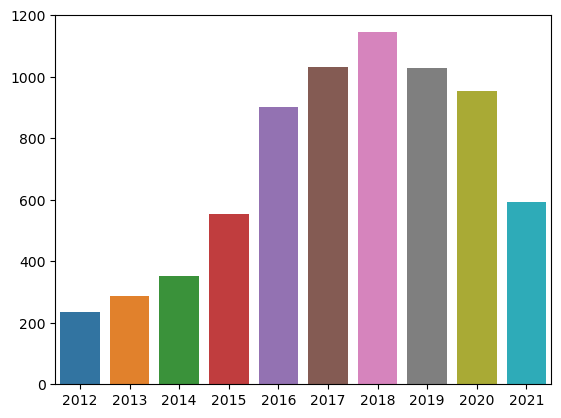

In [32]:
sns.barplot(x=top_release_year.index,y=top_release_year.values)

`Bar plot and Line plot tells us that production of Movies and TV shows has been increased till the year 2018
but there is sudden drop in the production after 2018`

## Analysis Report
- United State ranked no.1 in the production of TV shows and Movies as compared to India and UK
- Most popular Director on Netflix is Rajiv Chilaka
- Movies got Maximum ratings as compared to TV shows(Movie -> 6124 , Series -> 2663)
- From the Analysis of Rating it predicts that conclude that Netflix is not Popular for Kids
- Top category which has been produced is Dramas,International movies.
- Production of Movies and TV shows has been increased till the year 2018 but there is sudden drop in the production after 2018